In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [2]:
import matplotlib as mpl
 
mpl.rc('font', family='NanumBarunGothic')

In [3]:
df = pd.read_csv("../data/BC_Card_edit.csv")
print(df.info())
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 519297 entries, 0 to 519296
Data columns (total 13 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   기준년월        519297 non-null  int64 
 1   품목대분류코드     519297 non-null  int64 
 2   품목대분류명      519297 non-null  object
 3   품목중분류코드     519297 non-null  int64 
 4   품목중분류명      519297 non-null  object
 5   성별          519297 non-null  object
 6   연령          519297 non-null  object
 7   가구생애주기      519297 non-null  object
 8   고객소재지_광역시도  519297 non-null  object
 9   고객소재지_시군구   519297 non-null  object
 10  고객소재지_읍면동   519297 non-null  object
 11  매출금액        519297 non-null  int64 
 12  매출건수        519297 non-null  int64 
dtypes: int64(5), object(8)
memory usage: 51.5+ MB
None


,기준년월,품목대분류코드,품목대분류명,품목중분류코드,품목중분류명,성별,연령,가구생애주기,고객소재지_광역시도,고객소재지_시군구,고객소재지_읍면동,매출금액,매출건수
0,201903,10,의류,1010,여성의류,여성,40대,초중고자녀가구,서울특별시,구로구,궁동,782521,13
1,201903,21,e상품/서비스,2110,o2o서비스,여성,20대,신혼영유아가구,서울특별시,구로구,궁동,963789,29
2,201903,19,출산/육아,1913,육아용품서비스,여성,30대,신혼영유아가구,서울특별시,구로구,궁동,924309,46
3,201903,21,e상품/서비스,2111,e머니/상품권,여성,30대,신혼영유아가구,서울특별시,구로구,궁동,1089360,54
4,201903,17,생활,1710,생활용품,여성,30대,신혼영유아가구,서울특별시,구로구,궁동,1656740,58


In [4]:
df['기준년월'].value_counts()

202003    135706
202103    128725
201909    109747
202009     76858
201903     68261
Name: 기준년월, dtype: int64

In [5]:
df = df[df['고객소재지_광역시도'] == '서울특별시']
df_2003 = df[df['기준년월'] == 202003]

In [6]:
df_2003.head(10)

,기준년월,품목대분류코드,품목대분류명,품목중분류코드,품목중분류명,성별,연령,가구생애주기,고객소재지_광역시도,고객소재지_시군구,고객소재지_읍면동,매출금액,매출건수
177298,202003,20,여가/스포츠,2013,여행,남성,20대,1인가구,서울특별시,구로구,궁동,201000,5
177304,202003,13,가구,1314,기타,여성,50대,성인자녀가구,서울특별시,강동구,길동,366020,5
177305,202003,20,여가/스포츠,2012,문화,남성,30대,신혼영유아가구,서울특별시,강동구,길동,396400,4
177306,202003,20,여가/스포츠,2013,여행,여성,20대,1인가구,서울특별시,강동구,길동,4934890,75
177307,202003,15,전자,1511,디지털,남성,20대,신혼영유아가구,서울특별시,강동구,길동,85200,4
177308,202003,15,전자,1511,디지털,남성,20대,1인가구,서울특별시,강동구,길동,5903422,36
177309,202003,99,기타,9911,기타결제,남성,50대,성인자녀가구,서울특별시,강동구,길동,2591500,12
177310,202003,12,뷰티,1211,메이크업,여성,20세 미만,1인가구,서울특별시,강동구,길동,150591,5
177311,202003,12,뷰티,1212,바디케어,여성,50대,성인자녀가구,서울특별시,강동구,길동,523576,10
177314,202003,99,기타,9911,기타결제,남성,20대,1인가구,서울특별시,광진구,능동,17500,4


In [7]:
sigoongu = list(set(df_2003['고객소재지_시군구']))
print(len(sigoongu))

25


In [8]:
big_category = list(set(df_2003['품목대분류명']))
print(len(big_category))

middle_category = list(set(df_2003['품목중분류명']))
print(len(middle_category))

13
49


In [9]:
lifestyle = list(set(df_2003['가구생애주기']))
print(len(lifestyle))
lifestyle

5


['초중고자녀가구', '신혼영유아가구', '성인자녀가구', '노인가구', '1인가구']

지역별 매출
송파구     5321
강남구     5229
마포구     5201
영등포구    4874
성북구     4318
은평구     3884
강동구     3723
성동구     3688
용산구     3642
강서구     3601
서대문구    3447
서초구     3260
구로구     3191
동대문구    3143
동작구     3041
광진구     2684
노원구     2568
중랑구     2486
종로구     2472
양천구     1868
관악구     1760
도봉구     1751
중구      1694
강북구     1644
금천구     1405
Name: 고객소재지_시군구, dtype: int64


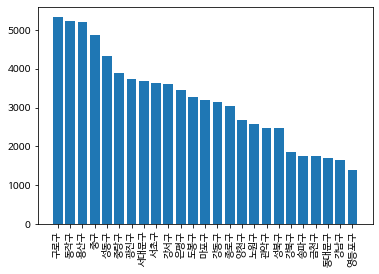

In [10]:
print('지역별 매출')
print(df_2003['고객소재지_시군구'].value_counts())
df_2003_total = df_2003['고객소재지_시군구'].value_counts().tolist()

plt.bar(sigoongu, df_2003_total)
plt.xticks(rotation = 90)
plt.show()

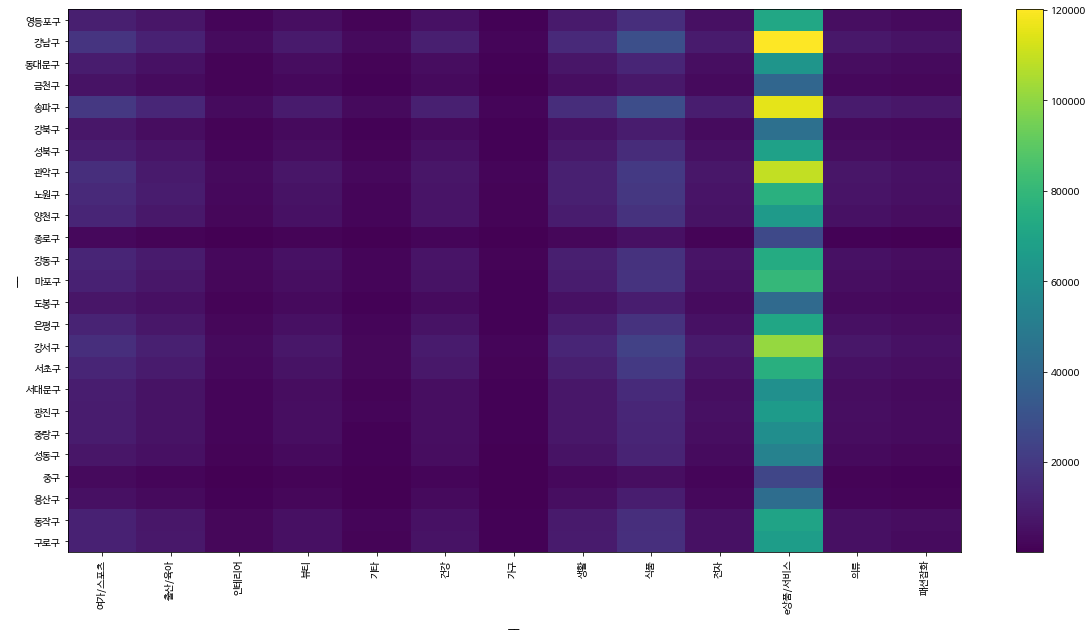

In [11]:
# 시군구 - 매출건수(품목대분류명)
pack = []
for gu in sigoongu:
    temp = df_2003[df_2003['고객소재지_시군구'] == gu]
    title = list(set(temp['품목대분류명']))
    title_count = {}
    for t in title:
        temp_b = temp[temp['품목대분류명']==t]

        count = temp_b['매출건수'].sum()
        title_count[t] = count
    pack.append(title_count)

sigoongu_moneycount_large = pd.DataFrame(pack, index=sigoongu)
sigoongu_moneycount_large = sigoongu_moneycount_large.fillna(0)
plt.figure(figsize=(20,10))
plt.pcolor(sigoongu_moneycount_large)
plt.xticks(np.arange(0.5, len(sigoongu_moneycount_large.columns), 1), sigoongu_moneycount_large.columns, rotation=90)
plt.yticks(np.arange(0.5, len(sigoongu_moneycount_large.index), 1), sigoongu_moneycount_large.index)
plt.xlabel('__', fontsize=14)
plt.ylabel('__', fontsize=14)
plt.colorbar()
plt.show()

In [12]:
#  시군구 - 매출건수(품목대분류명)
pack = []
for gu in sigoongu:
    temp = df_2003[df_2003['고객소재지_시군구'] == gu]
    title = list(set(temp['품목대분류명']))
    title_count = {}
    for t in title:
        temp_b = temp[temp['품목대분류명']==t]

        count = temp_b['매출건수'].sum()
        title_count[t] = count
    pack.append(title_count)

big_pack = pd.DataFrame(pack, index=sigoongu)
big_pack = big_pack.fillna(0)
big_pack.rank(method = 'min', ascending = False)

,여가/스포츠,출산/육아,인테리어,뷰티,기타,건강,가구,생활,식품,전자,e상품/서비스,의류,패션잡화
구로구,12.0,9.0,12.0,9.0,17.0,9.0,11.0,11.0,11.0,11.0,13.0,10.0,11.0
동작구,11.0,12.0,11.0,10.0,11.0,13.0,9.0,12.0,12.0,12.0,11.0,9.0,10.0
용산구,23.0,23.0,23.0,23.0,23.0,23.0,24.0,22.0,21.0,23.0,21.0,23.0,23.0
중구,24.0,24.0,24.0,24.0,24.0,24.0,23.0,24.0,25.0,24.0,25.0,24.0,24.0
성동구,20.0,19.0,19.0,19.0,20.0,19.0,22.0,19.0,19.0,19.0,19.0,21.0,21.0
중랑구,18.0,15.0,15.0,14.0,18.0,17.0,12.0,15.0,18.0,17.0,18.0,15.0,14.0
광진구,17.0,16.0,13.0,15.0,7.0,15.0,13.0,16.0,16.0,14.0,14.0,13.0,13.0
서대문구,15.0,17.0,16.0,18.0,15.0,16.0,19.0,17.0,15.0,16.0,17.0,16.0,15.0
서초구,6.0,6.0,7.0,6.0,5.0,4.0,6.0,7.0,4.0,7.0,7.0,8.0,6.0
강서구,4.0,3.0,3.0,3.0,4.0,3.0,3.0,3.0,3.0,3.0,4.0,3.0,3.0


In [13]:
#  각 시군구 내에서 매출건수(품목대분류명) 기준으로 순위
pack = []
for gu in sigoongu:
    temp = df_2003[df_2003['고객소재지_시군구'] == gu]
    title = list(set(temp['품목대분류명']))
    title_count = {}
    for t in title:
        temp_b = temp[temp['품목대분류명']==t]

        count = temp_b['매출건수'].sum()
        title_count[t] = count
    pack.append(title_count)

big_pack = pd.DataFrame(pack, index=sigoongu)
big_pack = big_pack.fillna(0)
big_pack.rank(method = 'min', ascending = False, axis = 1)

,여가/스포츠,출산/육아,인테리어,뷰티,기타,건강,가구,생활,식품,전자,e상품/서비스,의류,패션잡화
구로구,3.0,5.0,11.0,8.0,12.0,6.0,13.0,4.0,2.0,7.0,1.0,9.0,10.0
동작구,3.0,5.0,11.0,9.0,12.0,7.0,13.0,4.0,2.0,6.0,1.0,8.0,10.0
용산구,3.0,5.0,11.0,8.0,12.0,6.0,13.0,4.0,2.0,7.0,1.0,9.0,10.0
중구,3.0,5.0,11.0,8.0,12.0,7.0,13.0,4.0,2.0,6.0,1.0,9.0,10.0
성동구,3.0,5.0,11.0,8.0,12.0,6.0,13.0,4.0,2.0,7.0,1.0,9.0,10.0
중랑구,3.0,5.0,11.0,8.0,12.0,7.0,13.0,4.0,2.0,6.0,1.0,9.0,10.0
광진구,3.0,5.0,12.0,9.0,11.0,7.0,13.0,4.0,2.0,6.0,1.0,8.0,10.0
서대문구,3.0,5.0,11.0,8.0,12.0,7.0,13.0,4.0,2.0,6.0,1.0,9.0,10.0
서초구,3.0,5.0,11.0,8.0,12.0,6.0,13.0,4.0,2.0,7.0,1.0,9.0,10.0
강서구,3.0,5.0,11.0,9.0,12.0,6.0,13.0,4.0,2.0,7.0,1.0,8.0,10.0


In [14]:
# 클러스터링
# 시군구 - 매출건수(품목대분류명)

import numpy as np
from sklearn.cluster import KMeans
import seaborn as sns

datapoints = sigoongu_moneycount_large.values
kmeans = KMeans(n_clusters=5).fit(datapoints)

sigoongu_moneycount_large['cluster_id'] = kmeans.labels_
for i in range(5):
    temp = sigoongu_moneycount_large[sigoongu_moneycount_large['cluster_id'] == i]
    print(temp['cluster_id'])

서초구     0
은평구     0
마포구     0
강동구     0
노원구     0
영등포구    0
Name: cluster_id, dtype: int32
용산구    1
성동구    1
도봉구    1
강북구    1
금천구    1
Name: cluster_id, dtype: int32
강서구    2
관악구    2
송파구    2
강남구    2
Name: cluster_id, dtype: int32
구로구     3
동작구     3
중랑구     3
광진구     3
서대문구    3
양천구     3
성북구     3
동대문구    3
Name: cluster_id, dtype: int32
중구     4
종로구    4
Name: cluster_id, dtype: int32


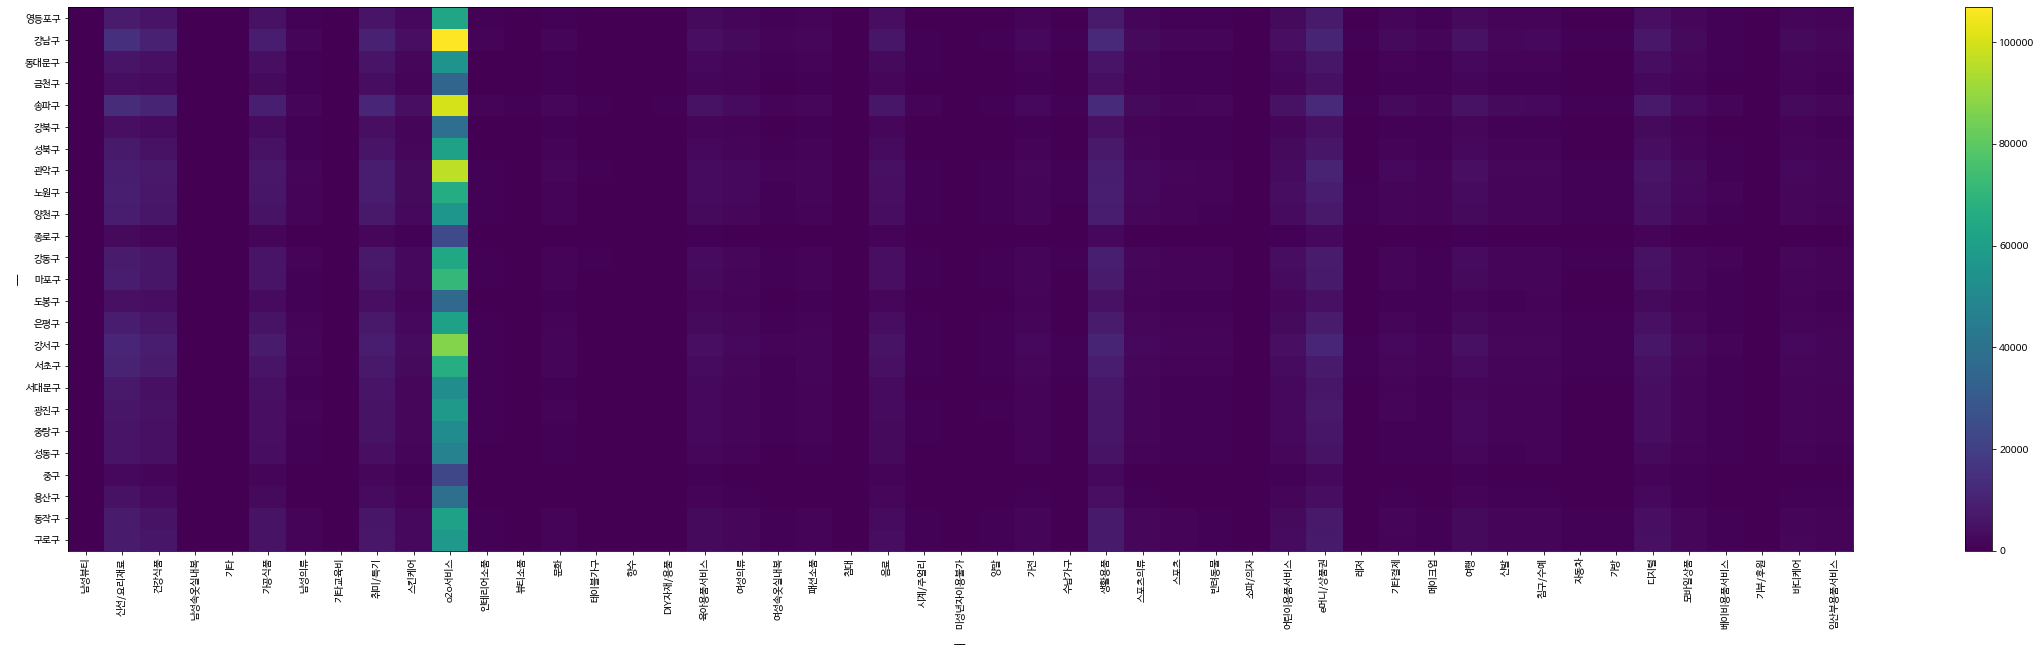

In [15]:
# 시군구 - 매출건수(품목중분류명)
pack = []
for gu in sigoongu:
    temp = df_2003[df_2003['고객소재지_시군구'] == gu]
    title = list(set(temp['품목중분류명']))
    title_count = {}
    for t in title:
        temp_b = temp[temp['품목중분류명']==t]

        count = temp_b['매출건수'].sum()
        title_count[t] = count
    pack.append(title_count)

sigoongu_moneycount_middle = pd.DataFrame(pack, index=sigoongu)
sigoongu_moneycount_middle = sigoongu_moneycount_middle.fillna(0)
plt.figure(figsize=(40,10))
plt.pcolor(sigoongu_moneycount_middle)
plt.xticks(np.arange(0.5, len(sigoongu_moneycount_middle.columns), 1), sigoongu_moneycount_middle.columns, rotation=90)
plt.yticks(np.arange(0.5, len(sigoongu_moneycount_middle.index), 1), sigoongu_moneycount_middle.index)
plt.xlabel('__', fontsize=14)
plt.ylabel('__', fontsize=14)
plt.colorbar()
plt.show()

In [16]:
#  시군구 - 매출건수(품목중분류명) - 순위
pack = []
for gu in sigoongu:
    temp = df_2003[df_2003['고객소재지_시군구'] == gu]
    title = list(set(temp['품목중분류명']))
    title_count = {}
    for t in title:
        temp_b = temp[temp['품목중분류명']==t]

        count = temp_b['매출건수'].sum()
        title_count[t] = count
    pack.append(title_count)

big_pack = pd.DataFrame(pack, index=sigoongu)
big_pack = big_pack.fillna(0)
big_pack.rank(method = 'min', ascending = False)

,남성뷰티,신선/요리재료,건강식품,남성속옷실내복,기타,가공식품,남성의류,기타교육비,취미/특기,스킨케어,...,신발,침구/수예,자동차,가방,디지털,모바일상품,베이비용품서비스,기부/후원,바디케어,임산부용품서비스
구로구,6.0,10.0,9.0,8.0,9.0,11.0,11.0,20.0,10.0,12.0,...,12.0,12.0,10.0,10.0,10.0,9.0,10.0,10.0,9.0,11.0
동작구,13.0,13.0,13.0,14.0,10.0,12.0,10.0,5.0,11.0,9.0,...,9.0,11.0,9.0,11.0,12.0,10.0,9.0,11.0,11.0,10.0
용산구,23.0,20.0,23.0,24.0,24.0,22.0,24.0,25.0,23.0,23.0,...,23.0,23.0,23.0,23.0,23.0,23.0,23.0,20.0,23.0,23.0
중구,20.0,25.0,24.0,22.0,23.0,25.0,23.0,23.0,25.0,24.0,...,24.0,24.0,24.0,23.0,24.0,24.0,24.0,24.0,24.0,24.0
성동구,20.0,17.0,19.0,23.0,20.0,19.0,21.0,22.0,21.0,19.0,...,19.0,19.0,19.0,22.0,20.0,21.0,18.0,19.0,19.0,20.0
중랑구,12.0,19.0,17.0,9.0,11.0,17.0,15.0,12.0,18.0,18.0,...,16.0,17.0,13.0,13.0,17.0,15.0,15.0,13.0,13.0,18.0
광진구,17.0,16.0,15.0,10.0,15.0,16.0,12.0,4.0,17.0,14.0,...,15.0,14.0,12.0,12.0,14.0,16.0,16.0,12.0,15.0,14.0
서대문구,20.0,15.0,16.0,19.0,21.0,15.0,13.0,17.0,13.0,16.0,...,13.0,15.0,15.0,15.0,16.0,18.0,20.0,6.0,17.0,16.0
서초구,10.0,4.0,4.0,7.0,4.0,6.0,7.0,10.0,8.0,5.0,...,7.0,7.0,6.0,6.0,7.0,12.0,5.0,7.0,6.0,5.0
강서구,2.0,3.0,3.0,3.0,5.0,3.0,2.0,5.0,4.0,3.0,...,3.0,3.0,2.0,3.0,3.0,3.0,2.0,8.0,3.0,3.0


In [17]:
#  각 시군구 내에서 매출건수(품목중분류명) 기준으로 순위
pack = []
for gu in sigoongu:
    temp = df_2003[df_2003['고객소재지_시군구'] == gu]
    title = list(set(temp['품목중분류명']))
    title_count = {}
    for t in title:
        temp_b = temp[temp['품목중분류명']==t]

        count = temp_b['매출건수'].sum()
        title_count[t] = count
    pack.append(title_count)

big_pack = pd.DataFrame(pack, index=sigoongu)
big_pack = big_pack.fillna(0)
big_pack.rank(method = 'min', ascending = False, axis = 1)

,남성뷰티,신선/요리재료,건강식품,남성속옷실내복,기타,가공식품,남성의류,기타교육비,취미/특기,스킨케어,...,신발,침구/수예,자동차,가방,디지털,모바일상품,베이비용품서비스,기부/후원,바디케어,임산부용품서비스
구로구,48.0,2.0,6.0,43.0,41.0,7.0,24.0,45.0,5.0,13.0,...,20.0,19.0,35.0,33.0,8.0,14.0,29.0,49.0,15.0,21.0
동작구,49.0,2.0,6.0,45.0,41.0,7.0,25.0,42.0,5.0,13.0,...,19.0,21.0,33.0,35.0,8.0,14.0,28.0,48.0,17.0,22.0
용산구,47.0,2.0,6.0,43.0,42.0,7.0,29.0,41.0,5.0,13.0,...,19.0,21.0,34.0,35.0,8.0,17.0,28.0,45.0,14.0,20.0
중구,48.0,2.0,6.0,45.0,40.0,7.0,24.0,43.0,5.0,13.0,...,18.0,20.0,33.0,34.0,8.0,14.0,29.0,49.0,16.0,21.0
성동구,49.0,2.0,5.0,46.0,41.0,7.0,26.0,42.0,6.0,13.0,...,20.0,19.0,32.0,36.0,8.0,14.0,29.0,48.0,15.0,22.0
중랑구,48.0,4.0,6.0,43.0,41.0,7.0,25.0,44.0,5.0,13.0,...,18.0,19.0,34.0,35.0,8.0,14.0,28.0,49.0,15.0,22.0
광진구,49.0,3.0,6.0,44.0,42.0,7.0,24.0,39.0,5.0,13.0,...,20.0,21.0,34.0,35.0,8.0,15.0,29.0,48.0,18.0,23.0
서대문구,49.0,2.0,6.0,44.0,41.0,7.0,25.0,42.0,5.0,13.0,...,18.0,20.0,35.0,34.0,8.0,14.0,30.0,45.0,17.0,22.0
서초구,49.0,2.0,4.0,42.0,39.0,7.0,26.0,43.0,6.0,13.0,...,21.0,20.0,34.0,35.0,8.0,18.0,29.0,47.0,16.0,22.0
강서구,47.0,3.0,5.0,42.0,41.0,7.0,24.0,44.0,6.0,13.0,...,20.0,21.0,33.0,35.0,8.0,14.0,29.0,49.0,15.0,23.0


In [18]:
# 클러스터링
# 시군구 - 매출건수(품목중분류명)

import numpy as np
from sklearn.cluster import KMeans
import seaborn as sns

datapoints = sigoongu_moneycount_middle.values
kmeans = KMeans(n_clusters=5).fit(datapoints)

sigoongu_moneycount_middle['cluster_id'] = kmeans.labels_
for i in range(5):
    temp = sigoongu_moneycount_middle[sigoongu_moneycount_middle['cluster_id'] == i]
    print(temp['cluster_id'])

구로구     0
성동구     0
중랑구     0
광진구     0
서대문구    0
양천구     0
동대문구    0
Name: cluster_id, dtype: int32
강서구    1
관악구    1
송파구    1
강남구    1
Name: cluster_id, dtype: int32
중구     2
종로구    2
Name: cluster_id, dtype: int32
동작구     3
서초구     3
은평구     3
마포구     3
강동구     3
노원구     3
성북구     3
영등포구    3
Name: cluster_id, dtype: int32
용산구    4
도봉구    4
강북구    4
금천구    4
Name: cluster_id, dtype: int32


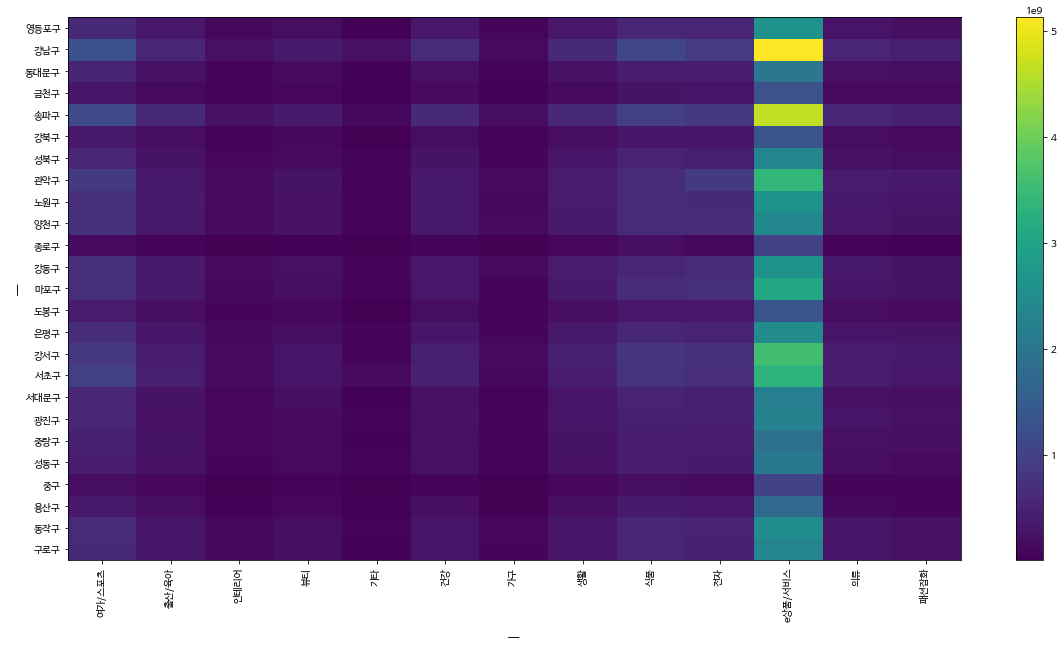

In [19]:
# 시군구 - 매출금액(품목대분류명)
pack = []
for gu in sigoongu:
    temp = df_2003[df_2003['고객소재지_시군구'] == gu]
    title = list(set(temp['품목대분류명']))
    title_count = {}
    for t in title:
        temp_b = temp[temp['품목대분류명']==t]

        count = temp_b['매출금액'].sum()
        title_count[t] = count
    pack.append(title_count)

sigoongu_money_large = pd.DataFrame(pack, index=sigoongu)
sigoongu_money_large = sigoongu_money_large.fillna(0)
plt.figure(figsize=(20,10))
plt.pcolor(sigoongu_money_large)
plt.xticks(np.arange(0.5, len(sigoongu_money_large.columns), 1), sigoongu_money_large.columns, rotation=90)
plt.yticks(np.arange(0.5, len(sigoongu_money_large.index), 1), sigoongu_money_large.index)
plt.xlabel('__', fontsize=14)
plt.ylabel('__', fontsize=14)
plt.colorbar()
plt.show()

In [20]:
# 시군구 - 매출금액(품목대분류명) - 순위 매기기
pack = []
for gu in sigoongu:
    temp = df_2003[df_2003['고객소재지_시군구'] == gu]
    title = list(set(temp['품목대분류명']))
    title_count = {}
    for t in title:
        temp_b = temp[temp['품목대분류명']==t]

        count = temp_b['매출금액'].sum()
        title_count[t] = count
    pack.append(title_count)

big_pack = pd.DataFrame(pack, index=sigoongu)
big_pack = big_pack.fillna(0)
big_pack.rank(method = 'min', ascending= False)

,여가/스포츠,출산/육아,인테리어,뷰티,기타,건강,가구,생활,식품,전자,e상품/서비스,의류,패션잡화
구로구,13.0,13.0,13.0,9.0,20.0,12.0,12.0,13.0,13.0,13.0,13.0,13.0,13.0
동작구,11.0,11.0,11.0,10.0,13.0,13.0,9.0,12.0,11.0,12.0,10.0,9.0,11.0
용산구,21.0,21.0,23.0,23.0,21.0,20.0,24.0,22.0,20.0,20.0,20.0,23.0,23.0
중구,24.0,24.0,24.0,24.0,24.0,24.0,23.0,24.0,25.0,24.0,24.0,24.0,24.0
성동구,19.0,18.0,20.0,19.0,10.0,17.0,21.0,19.0,17.0,19.0,17.0,19.0,21.0
중랑구,18.0,15.0,17.0,17.0,17.0,19.0,13.0,17.0,19.0,18.0,19.0,18.0,16.0
광진구,14.0,17.0,16.0,15.0,6.0,15.0,15.0,15.0,16.0,14.0,15.0,14.0,12.0
서대문구,16.0,16.0,14.0,14.0,19.0,16.0,19.0,16.0,15.0,15.0,16.0,15.0,14.0
서초구,3.0,3.0,4.0,4.0,2.0,3.0,7.0,4.0,4.0,6.0,5.0,4.0,5.0
강서구,5.0,4.0,5.0,3.0,8.0,4.0,3.0,3.0,3.0,4.0,3.0,3.0,3.0


In [21]:
# 각 시군구 내에서 매출금액(품목대분류명) 기준 순위
pack = []
for gu in sigoongu:
    temp = df_2003[df_2003['고객소재지_시군구'] == gu]
    title = list(set(temp['품목대분류명']))
    title_count = {}
    for t in title:
        temp_b = temp[temp['품목대분류명']==t]

        count = temp_b['매출금액'].sum()
        title_count[t] = count
    pack.append(title_count)

big_pack = pd.DataFrame(pack, index=sigoongu)
big_pack = big_pack.fillna(0)
big_pack.rank(method = 'min', ascending= False, axis = 1)

,여가/스포츠,출산/육아,인테리어,뷰티,기타,건강,가구,생활,식품,전자,e상품/서비스,의류,패션잡화
구로구,2.0,5.0,11.0,10.0,13.0,7.0,12.0,6.0,3.0,4.0,1.0,8.0,9.0
동작구,2.0,6.0,11.0,10.0,13.0,8.0,12.0,5.0,3.0,4.0,1.0,7.0,9.0
용산구,3.0,7.0,11.0,9.0,12.0,5.0,13.0,6.0,2.0,4.0,1.0,8.0,10.0
중구,2.0,6.0,11.0,10.0,13.0,7.0,12.0,5.0,3.0,4.0,1.0,8.0,9.0
성동구,3.0,6.0,11.0,10.0,12.0,7.0,13.0,5.0,2.0,4.0,1.0,8.0,9.0
중랑구,2.0,5.0,11.0,10.0,13.0,8.0,12.0,6.0,3.0,4.0,1.0,7.0,9.0
광진구,2.0,7.0,11.0,10.0,13.0,8.0,12.0,5.0,4.0,3.0,1.0,6.0,9.0
서대문구,2.0,6.0,11.0,10.0,13.0,7.0,12.0,5.0,3.0,4.0,1.0,8.0,9.0
서초구,2.0,6.0,11.0,10.0,12.0,5.0,13.0,7.0,3.0,4.0,1.0,8.0,9.0
강서구,2.0,7.0,11.0,10.0,13.0,6.0,12.0,5.0,3.0,4.0,1.0,8.0,9.0


In [22]:
# 클러스터링
# 시군구 - 매출금액(품목대분류명)

import numpy as np
from sklearn.cluster import KMeans
import seaborn as sns

datapoints = sigoongu_money_large.values
kmeans = KMeans(n_clusters=5).fit(datapoints)

sigoongu_money_large['cluster_id'] = kmeans.labels_
for i in range(5):
    temp = sigoongu_money_large[sigoongu_money_large['cluster_id'] == i]
    print(temp['cluster_id'])

중구     0
도봉구    0
종로구    0
강북구    0
금천구    0
Name: cluster_id, dtype: int32
구로구     1
동작구     1
광진구     1
은평구     1
강동구     1
양천구     1
노원구     1
성북구     1
영등포구    1
Name: cluster_id, dtype: int32
송파구    2
강남구    2
Name: cluster_id, dtype: int32
서초구    3
강서구    3
마포구    3
관악구    3
Name: cluster_id, dtype: int32
용산구     4
성동구     4
중랑구     4
서대문구    4
동대문구    4
Name: cluster_id, dtype: int32


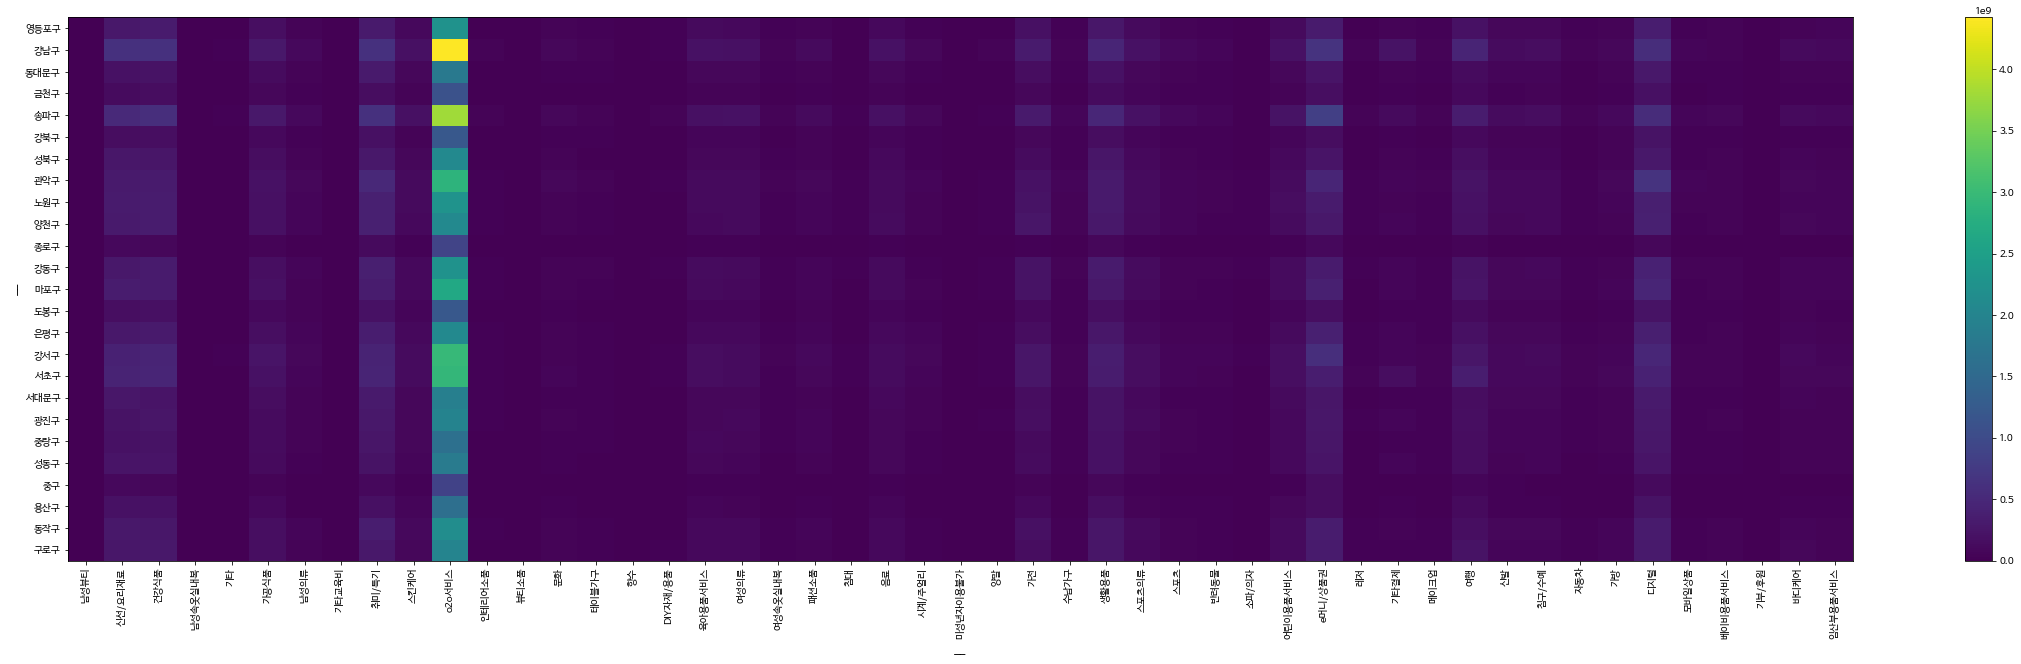

In [23]:
# 시군구 - 매출금액(품목중분류명)
pack = []
for gu in sigoongu:
    temp = df_2003[df_2003['고객소재지_시군구'] == gu]
    title = list(set(temp['품목중분류명']))
    title_count = {}
    for t in title:
        temp_b = temp[temp['품목중분류명']==t]

        count = temp_b['매출금액'].sum()
        title_count[t] = count
    pack.append(title_count)

sigoongu_money_middle = pd.DataFrame(pack, index=sigoongu)
sigoongu_money_middle = sigoongu_money_middle.fillna(0)
plt.figure(figsize=(40,10))
plt.pcolor(sigoongu_money_middle)
plt.xticks(np.arange(0.5, len(sigoongu_money_middle.columns), 1), sigoongu_money_middle, rotation=90)
plt.yticks(np.arange(0.5, len(sigoongu_money_middle.index), 1), sigoongu_money_middle.index)
plt.xlabel('__', fontsize=14)
plt.ylabel('__', fontsize=14)
plt.colorbar()
plt.show()

In [24]:
#  시군구 - 매출금액(품목중분류명) - 순위 매기기
pack = []
for gu in sigoongu:
    temp = df_2003[df_2003['고객소재지_시군구'] == gu]
    title = list(set(temp['품목중분류명']))
    title_count = {}
    for t in title:
        temp_b = temp[temp['품목중분류명']==t]

        count = temp_b['매출금액'].sum()
        title_count[t] = count
    pack.append(title_count)

big_pack = pd.DataFrame(pack, index=sigoongu)
big_pack = big_pack.fillna(0)
big_pack.rank(method = 'min', ascending = False)

,남성뷰티,신선/요리재료,건강식품,남성속옷실내복,기타,가공식품,남성의류,기타교육비,취미/특기,스킨케어,...,신발,침구/수예,자동차,가방,디지털,모바일상품,베이비용품서비스,기부/후원,바디케어,임산부용품서비스
구로구,7.0,13.0,12.0,8.0,10.0,12.0,11.0,21.0,17.0,15.0,...,15.0,15.0,16.0,9.0,13.0,10.0,12.0,11.0,6.0,11.0
동작구,14.0,11.0,13.0,19.0,9.0,11.0,8.0,17.0,10.0,9.0,...,10.0,12.0,10.0,8.0,12.0,12.0,7.0,14.0,13.0,13.0
용산구,23.0,19.0,20.0,24.0,24.0,20.0,24.0,24.0,21.0,20.0,...,23.0,23.0,23.0,24.0,20.0,23.0,23.0,21.0,22.0,22.0
중구,20.0,25.0,24.0,23.0,23.0,25.0,23.0,12.0,25.0,24.0,...,24.0,24.0,24.0,23.0,24.0,24.0,24.0,24.0,24.0,24.0
성동구,22.0,16.0,17.0,22.0,17.0,19.0,20.0,16.0,19.0,19.0,...,20.0,19.0,17.0,22.0,19.0,19.0,18.0,23.0,19.0,18.0
중랑구,11.0,20.0,19.0,11.0,16.0,18.0,13.0,4.0,18.0,18.0,...,16.0,18.0,13.0,14.0,18.0,14.0,16.0,10.0,17.0,19.0
광진구,18.0,17.0,15.0,10.0,12.0,17.0,12.0,1.0,16.0,13.0,...,14.0,16.0,8.0,10.0,16.0,15.0,13.0,16.0,16.0,14.0
서대문구,21.0,14.0,16.0,18.0,19.0,15.0,16.0,20.0,13.0,14.0,...,13.0,13.0,14.0,17.0,14.0,16.0,19.0,4.0,14.0,17.0
서초구,13.0,3.0,3.0,7.0,6.0,4.0,6.0,3.0,4.0,3.0,...,6.0,4.0,4.0,4.0,6.0,6.0,4.0,5.0,4.0,3.0
강서구,3.0,4.0,4.0,5.0,2.0,3.0,3.0,7.0,5.0,4.0,...,3.0,3.0,2.0,5.0,4.0,4.0,2.0,2.0,3.0,4.0


In [25]:
#  각 시군구 내에서 매출금액(품목중분류명) 기준 순위
pack = []
for gu in sigoongu:
    temp = df_2003[df_2003['고객소재지_시군구'] == gu]
    title = list(set(temp['품목중분류명']))
    title_count = {}
    for t in title:
        temp_b = temp[temp['품목중분류명']==t]

        count = temp_b['매출금액'].sum()
        title_count[t] = count
    pack.append(title_count)

big_pack = pd.DataFrame(pack, index=sigoongu)
big_pack = big_pack.fillna(0)
big_pack.rank(method = 'min', ascending = False, axis = 1)

,남성뷰티,신선/요리재료,건강식품,남성속옷실내복,기타,가공식품,남성의류,기타교육비,취미/특기,스킨케어,...,신발,침구/수예,자동차,가방,디지털,모바일상품,베이비용품서비스,기부/후원,바디케어,임산부용품서비스
구로구,46.0,6.0,5.0,45.0,41.0,9.0,21.0,49.0,4.0,16.0,...,19.0,18.0,36.0,20.0,3.0,27.0,26.0,48.0,17.0,23.0
동작구,48.0,5.0,6.0,45.0,39.0,10.0,20.0,46.0,2.0,15.0,...,17.0,18.0,34.0,22.0,4.0,28.0,26.0,49.0,21.0,24.0
용산구,47.0,4.0,3.0,44.0,42.0,9.0,26.0,46.0,5.0,14.0,...,19.0,17.0,36.0,32.0,2.0,28.0,27.0,45.0,18.0,20.0
중구,48.0,4.0,6.0,46.0,40.0,9.0,22.0,45.0,5.0,12.0,...,16.0,20.0,36.0,23.0,3.0,28.0,29.0,49.0,21.0,18.0
성동구,48.0,5.0,3.0,45.0,40.0,10.0,24.0,46.0,6.0,15.0,...,21.0,17.0,34.0,28.0,2.0,26.0,25.0,49.0,20.0,22.0
중랑구,48.0,7.0,5.0,45.0,42.0,9.0,20.0,46.0,4.0,15.0,...,17.0,18.0,34.0,22.0,2.0,27.0,25.0,49.0,21.0,24.0
광진구,48.0,6.0,5.0,46.0,40.0,10.0,22.0,43.0,3.0,14.0,...,17.0,18.0,31.0,21.0,2.0,30.0,28.0,49.0,23.0,24.0
서대문구,48.0,4.0,6.0,45.0,39.0,10.0,20.0,47.0,2.0,14.0,...,18.0,17.0,36.0,24.0,3.0,27.0,32.0,46.0,19.0,22.0
서초구,49.0,4.0,2.0,45.0,41.0,10.0,24.0,46.0,3.0,17.0,...,19.0,18.0,33.0,23.0,5.0,30.0,28.0,47.0,20.0,21.0
강서구,48.0,6.0,4.0,45.0,41.0,10.0,21.0,46.0,5.0,15.0,...,18.0,17.0,32.0,23.0,3.0,30.0,29.0,47.0,19.0,24.0


In [26]:
# 클러스터링
# 시군구 - 매출금액(품목중분류명)

import numpy as np
from sklearn.cluster import KMeans
import seaborn as sns

datapoints = sigoongu_money_middle.values
kmeans = KMeans(n_clusters=5).fit(datapoints)

sigoongu_money_middle['cluster_id'] = kmeans.labels_
for i in range(5):
    temp = sigoongu_money_middle[sigoongu_money_middle['cluster_id'] == i]
    print(temp['cluster_id'])

용산구     0
성동구     0
중랑구     0
광진구     0
서대문구    0
동대문구    0
Name: cluster_id, dtype: int32
서초구    1
강서구    1
마포구    1
관악구    1
Name: cluster_id, dtype: int32
중구     2
도봉구    2
종로구    2
강북구    2
금천구    2
Name: cluster_id, dtype: int32
송파구    3
강남구    3
Name: cluster_id, dtype: int32
구로구     4
동작구     4
은평구     4
강동구     4
양천구     4
노원구     4
성북구     4
영등포구    4
Name: cluster_id, dtype: int32
